In [49]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

wine_data = pd.read_csv('wine.csv')

# Data Undersatnding

In [50]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [51]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


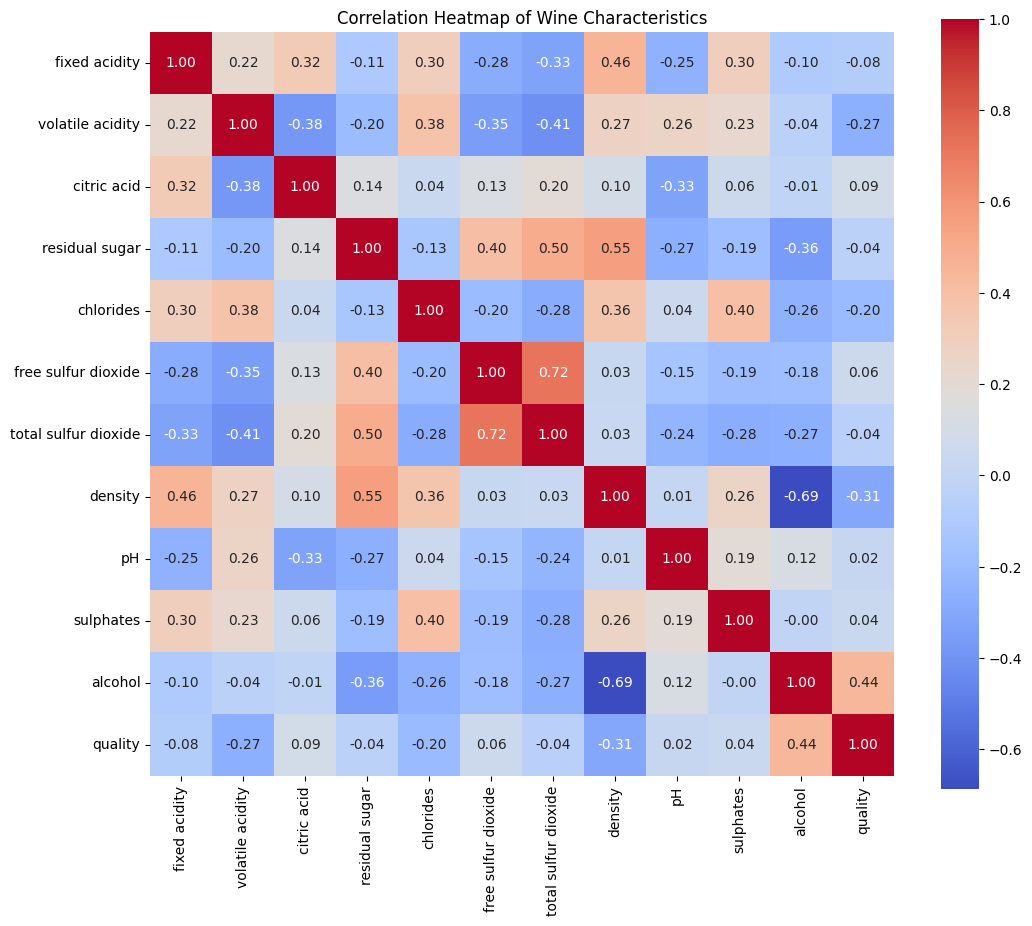

In [52]:
# Compute the correlation matrix
corr_matrix = wine_data.select_dtypes(include=[np.number]).corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Wine Characteristics')
plt.show()

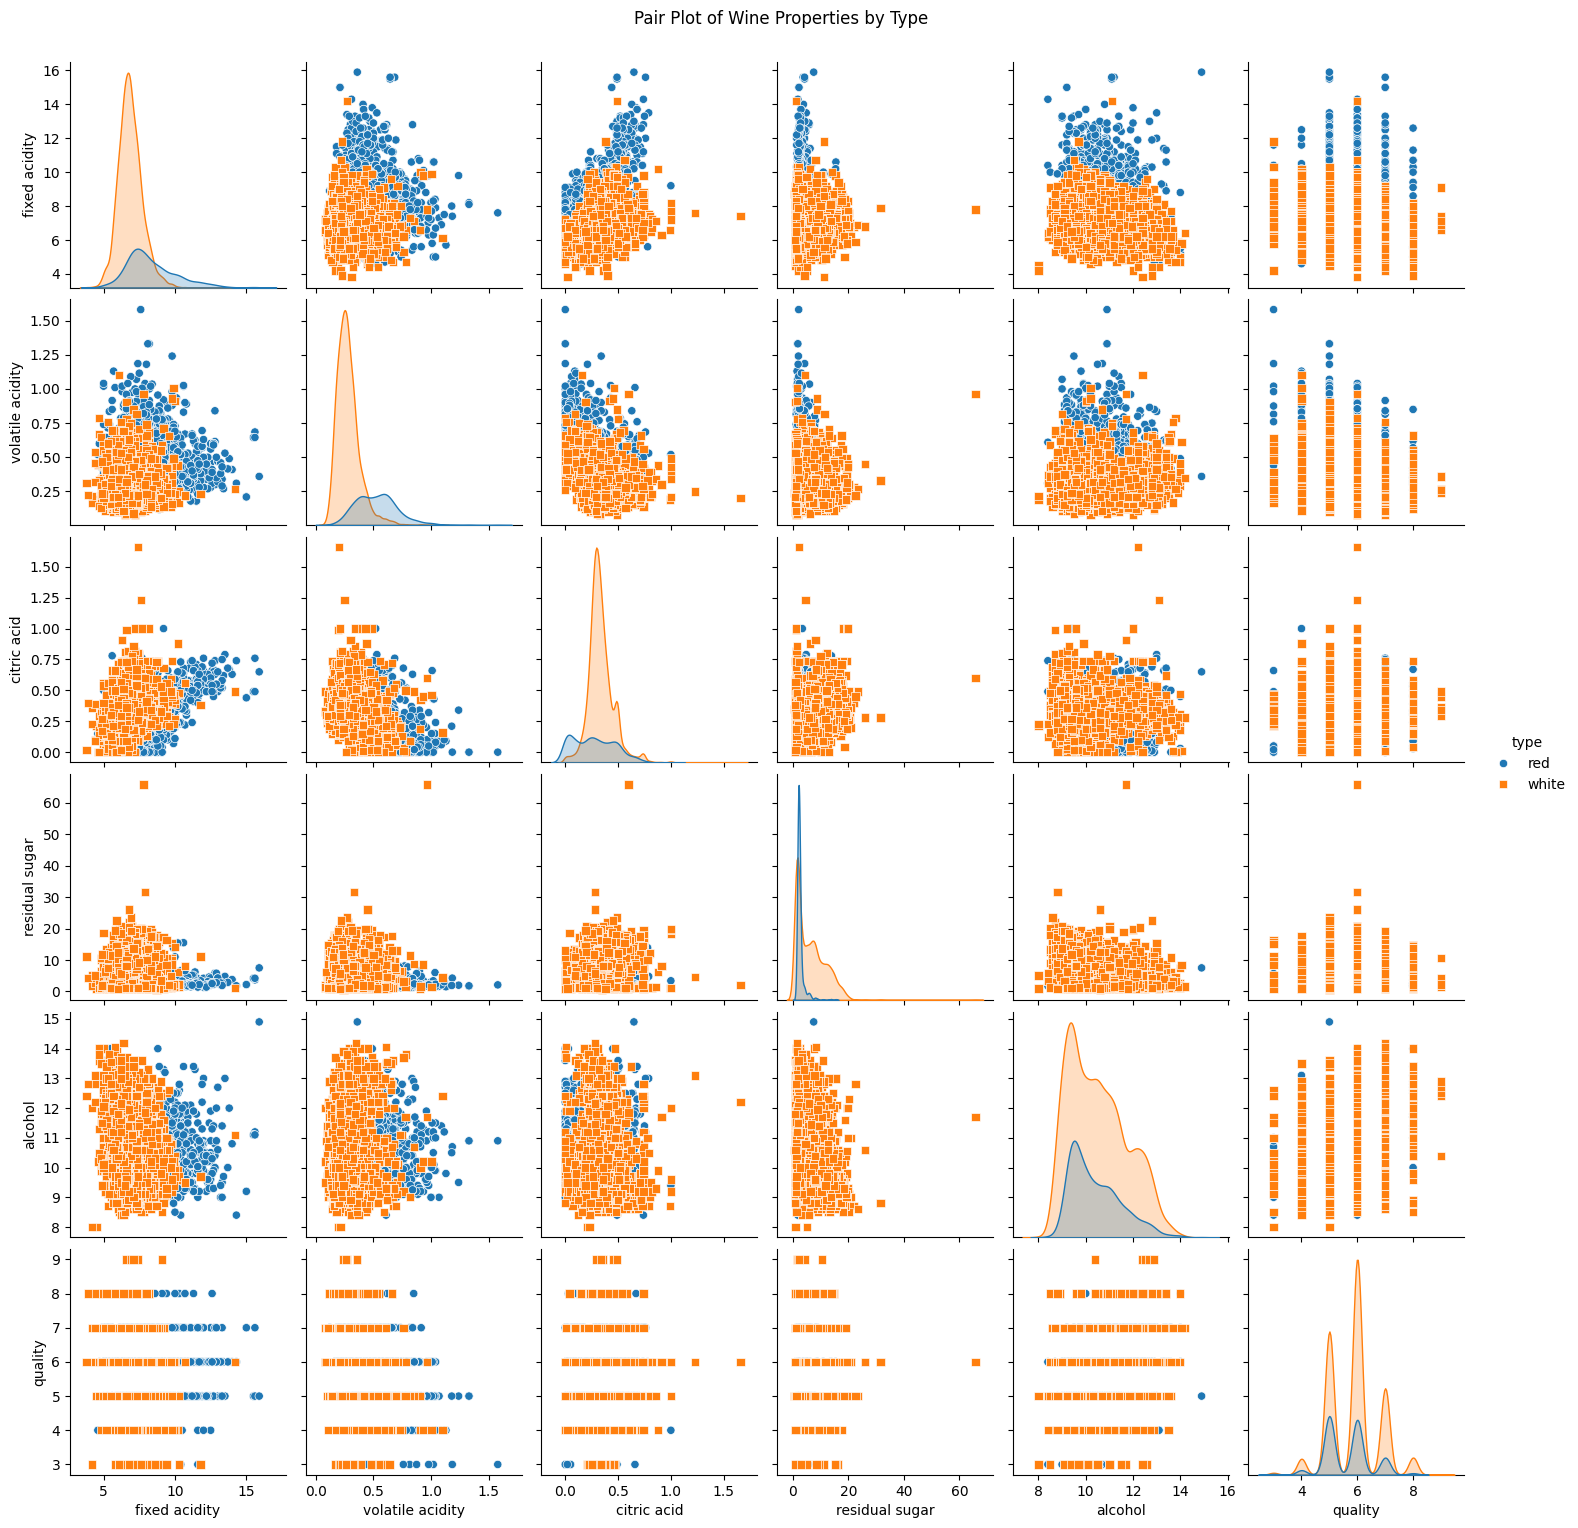

In [53]:
plot_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol', 'quality', 'type']

sns.pairplot(wine_data[plot_columns], hue='type', markers=['o','s'])
plt.suptitle("Pair Plot of Wine Properties by Type", y=1.02)
plt.show()

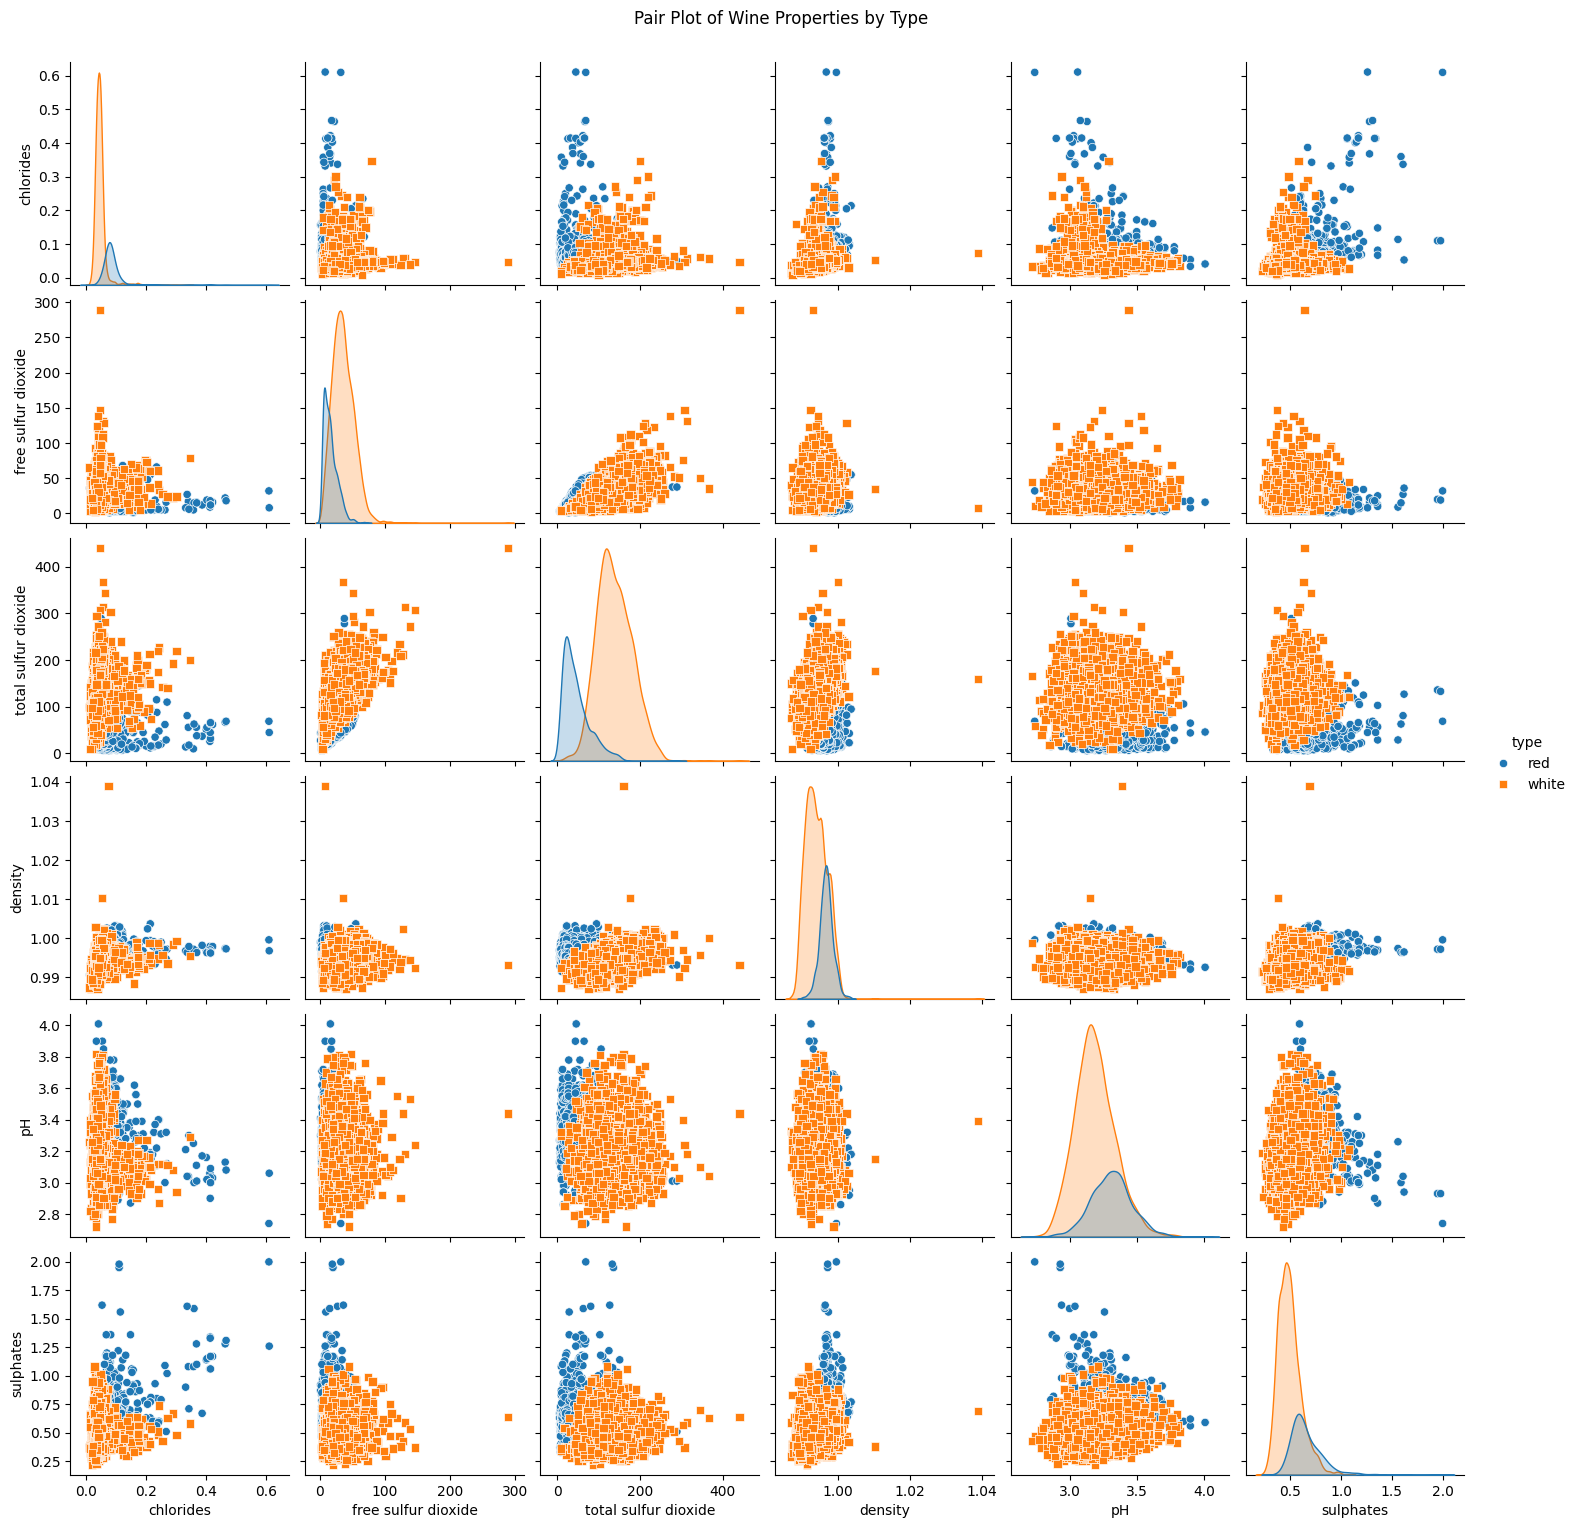

In [54]:
plot_columns = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'type']

sns.pairplot(wine_data[plot_columns], hue='type', markers=['o','s'])
plt.suptitle("Pair Plot of Wine Properties by Type", y=1.02)
plt.show()

# Data Preperation

In [55]:
# Drop duplicate rows and rows with null values
wine_data.dropna(inplace=True)
wine_data.drop_duplicates(inplace=True)

In [56]:
# Separate the features and the target variable
X = wine_data.iloc[:, :-1].values # Features: all columns except the last one
y = wine_data.iloc[:, -1].values # Target variable: the last column

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalise the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Classification

In [57]:
# Select the model
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
# Make predictions
y_pred = knn_classifier.predict(X_test)

In [59]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9924812030075187

Confusion Matrix:
 [[288   1]
 [  7 768]]

Classification Report:
               precision    recall  f1-score   support

         red       0.98      1.00      0.99       289
       white       1.00      0.99      0.99       775

    accuracy                           0.99      1064
   macro avg       0.99      0.99      0.99      1064
weighted avg       0.99      0.99      0.99      1064



In [60]:
# Saves the model
with open ('wine_knn_classification.pkl', 'wb') as file:
    pickle.dump(knn_classifier, file)

# Logistic Regression

In [61]:
# Select the model
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Make predictions
y_pred = log_reg_classifier.predict(X_test)

In [63]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9953007518796992

Confusion Matrix:
 [[287   2]
 [  3 772]]

Classification Report:
               precision    recall  f1-score   support

         red       0.99      0.99      0.99       289
       white       1.00      1.00      1.00       775

    accuracy                           1.00      1064
   macro avg       0.99      0.99      0.99      1064
weighted avg       1.00      1.00      1.00      1064



In [64]:
# Saves the model
with open ('wine_logistic_regression_classification.pkl', 'wb') as file:
    pickle.dump(log_reg_classifier, file)

# Support Vector Machine

In [65]:
# Select the model
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [66]:
# Make predictions
y_pred = svm_classifier.predict(X_test)

In [67]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9962406015037594

Confusion Matrix:
 [[287   2]
 [  2 773]]

Classification Report:
               precision    recall  f1-score   support

         red       0.99      0.99      0.99       289
       white       1.00      1.00      1.00       775

    accuracy                           1.00      1064
   macro avg       1.00      1.00      1.00      1064
weighted avg       1.00      1.00      1.00      1064



In [68]:
# Saves the model
with open ('wine_svm_classification.pkl', 'wb') as file:
    pickle.dump(svm_classifier, file)